### Characteristic function plotter

In [24]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [25]:
def inverse_fourier_transform(char_func, x_range, T=1):
    """
    Numerically compute the inverse Fourier transform of a given characteristic function.
    
    Parameters:
    - char_func: The characteristic function to invert. It should accept two arguments: t and T.
    - x_range: The range of x values (as a numpy array) for which to compute the PDF.
    - T: The time horizon for the characteristic function, defaulting to 1.
    
    Returns:
    - A numpy array of the same shape as x_range, containing the computed PDF values.
    """
    pdf_values = np.zeros_like(x_range, dtype=np.float64)
    
    for i, x in enumerate(x_range):
        integrand = lambda t: np.exp(-1j * t * x) * char_func(t, T) / (2 * np.pi)
        pdf_values[i] = quad(lambda t: np.real(integrand(t)), -np.inf, np.inf)[0]
        
    return pdf_values

#### Definition of chracteristic functions

In [26]:
Delta = 365 / 252 # Defined as the interval between monitoring dates

In [27]:
# Normal distribution characteristic function

def normal_cf(t, T=1):
    return np.exp(-0.5 * t**2 * T)

In [28]:
# Black-Scholes characteristic function
def black_scholes_cf(t, T=1, sigma=0.17801):
    return np.exp(-0.5 * sigma**2  * t**2 * Delta)

In [29]:
# NIG characteristic function
def nig_cf(t, T=1, alpha=6.1882, beta=-3.8941, delta=0.1622):
    return np.exp(-delta * Delta * (np.sqrt(alpha**2 - (beta + 1j * t)**2) - np.sqrt(alpha**2 - beta**2)))

In [30]:
# CGMY characteristic function
def cgmy_cf(t, T=1, C=0.0244, G=0.0765, M=7.5515, Y=1.2945):
    return np.exp(C * Delta * gamma(-Y) * ((M - 1j*t)**Y - M**Y + (G + 1j*t)**Y - G**Y))

In [31]:
# DE characteristic function
def de_cf(t, T=1, sigma=0.120381, lam=0.330966, p=0.20761, eta1=9.65997, eta2=3.13868):
    term1 = ((1-p) * eta2) / (eta2 + 1j*t)
    term2 = (p * eta1) / (eta1 + 1j*t)
    return np.exp((-0.5 * sigma**2 * t**2 * Delta) + lam * Delta * (term1 + term2 - 1))

In [32]:
# MJD charcateristic function
def jd_cf(t, T=1, sigma=0.126349, alpha=-0.390078, lam=0.174814, delta=0.338796):
    exponent = 1j * t * alpha - 0.5 * t**2 * delta ** 2
    return np.exp((-0.5 * sigma**2 * t**2 * Delta) + lam * Delta * (np.exp(exponent) - 1))

#### Plotting code

In [33]:
x_min = -1.2
x_max = 1.2
num_points=400
T=1

x_values = np.linspace(x_min, x_max, num_points)

bs_values = inverse_fourier_transform(black_scholes_cf, x_values, T)
nig_values = inverse_fourier_transform(nig_cf, x_values, T)
cgmy_values = inverse_fourier_transform(cgmy_cf, x_values, T)
de_values = inverse_fourier_transform(de_cf, x_values, T)
jd_values = inverse_fourier_transform(jd_cf, x_values, T)

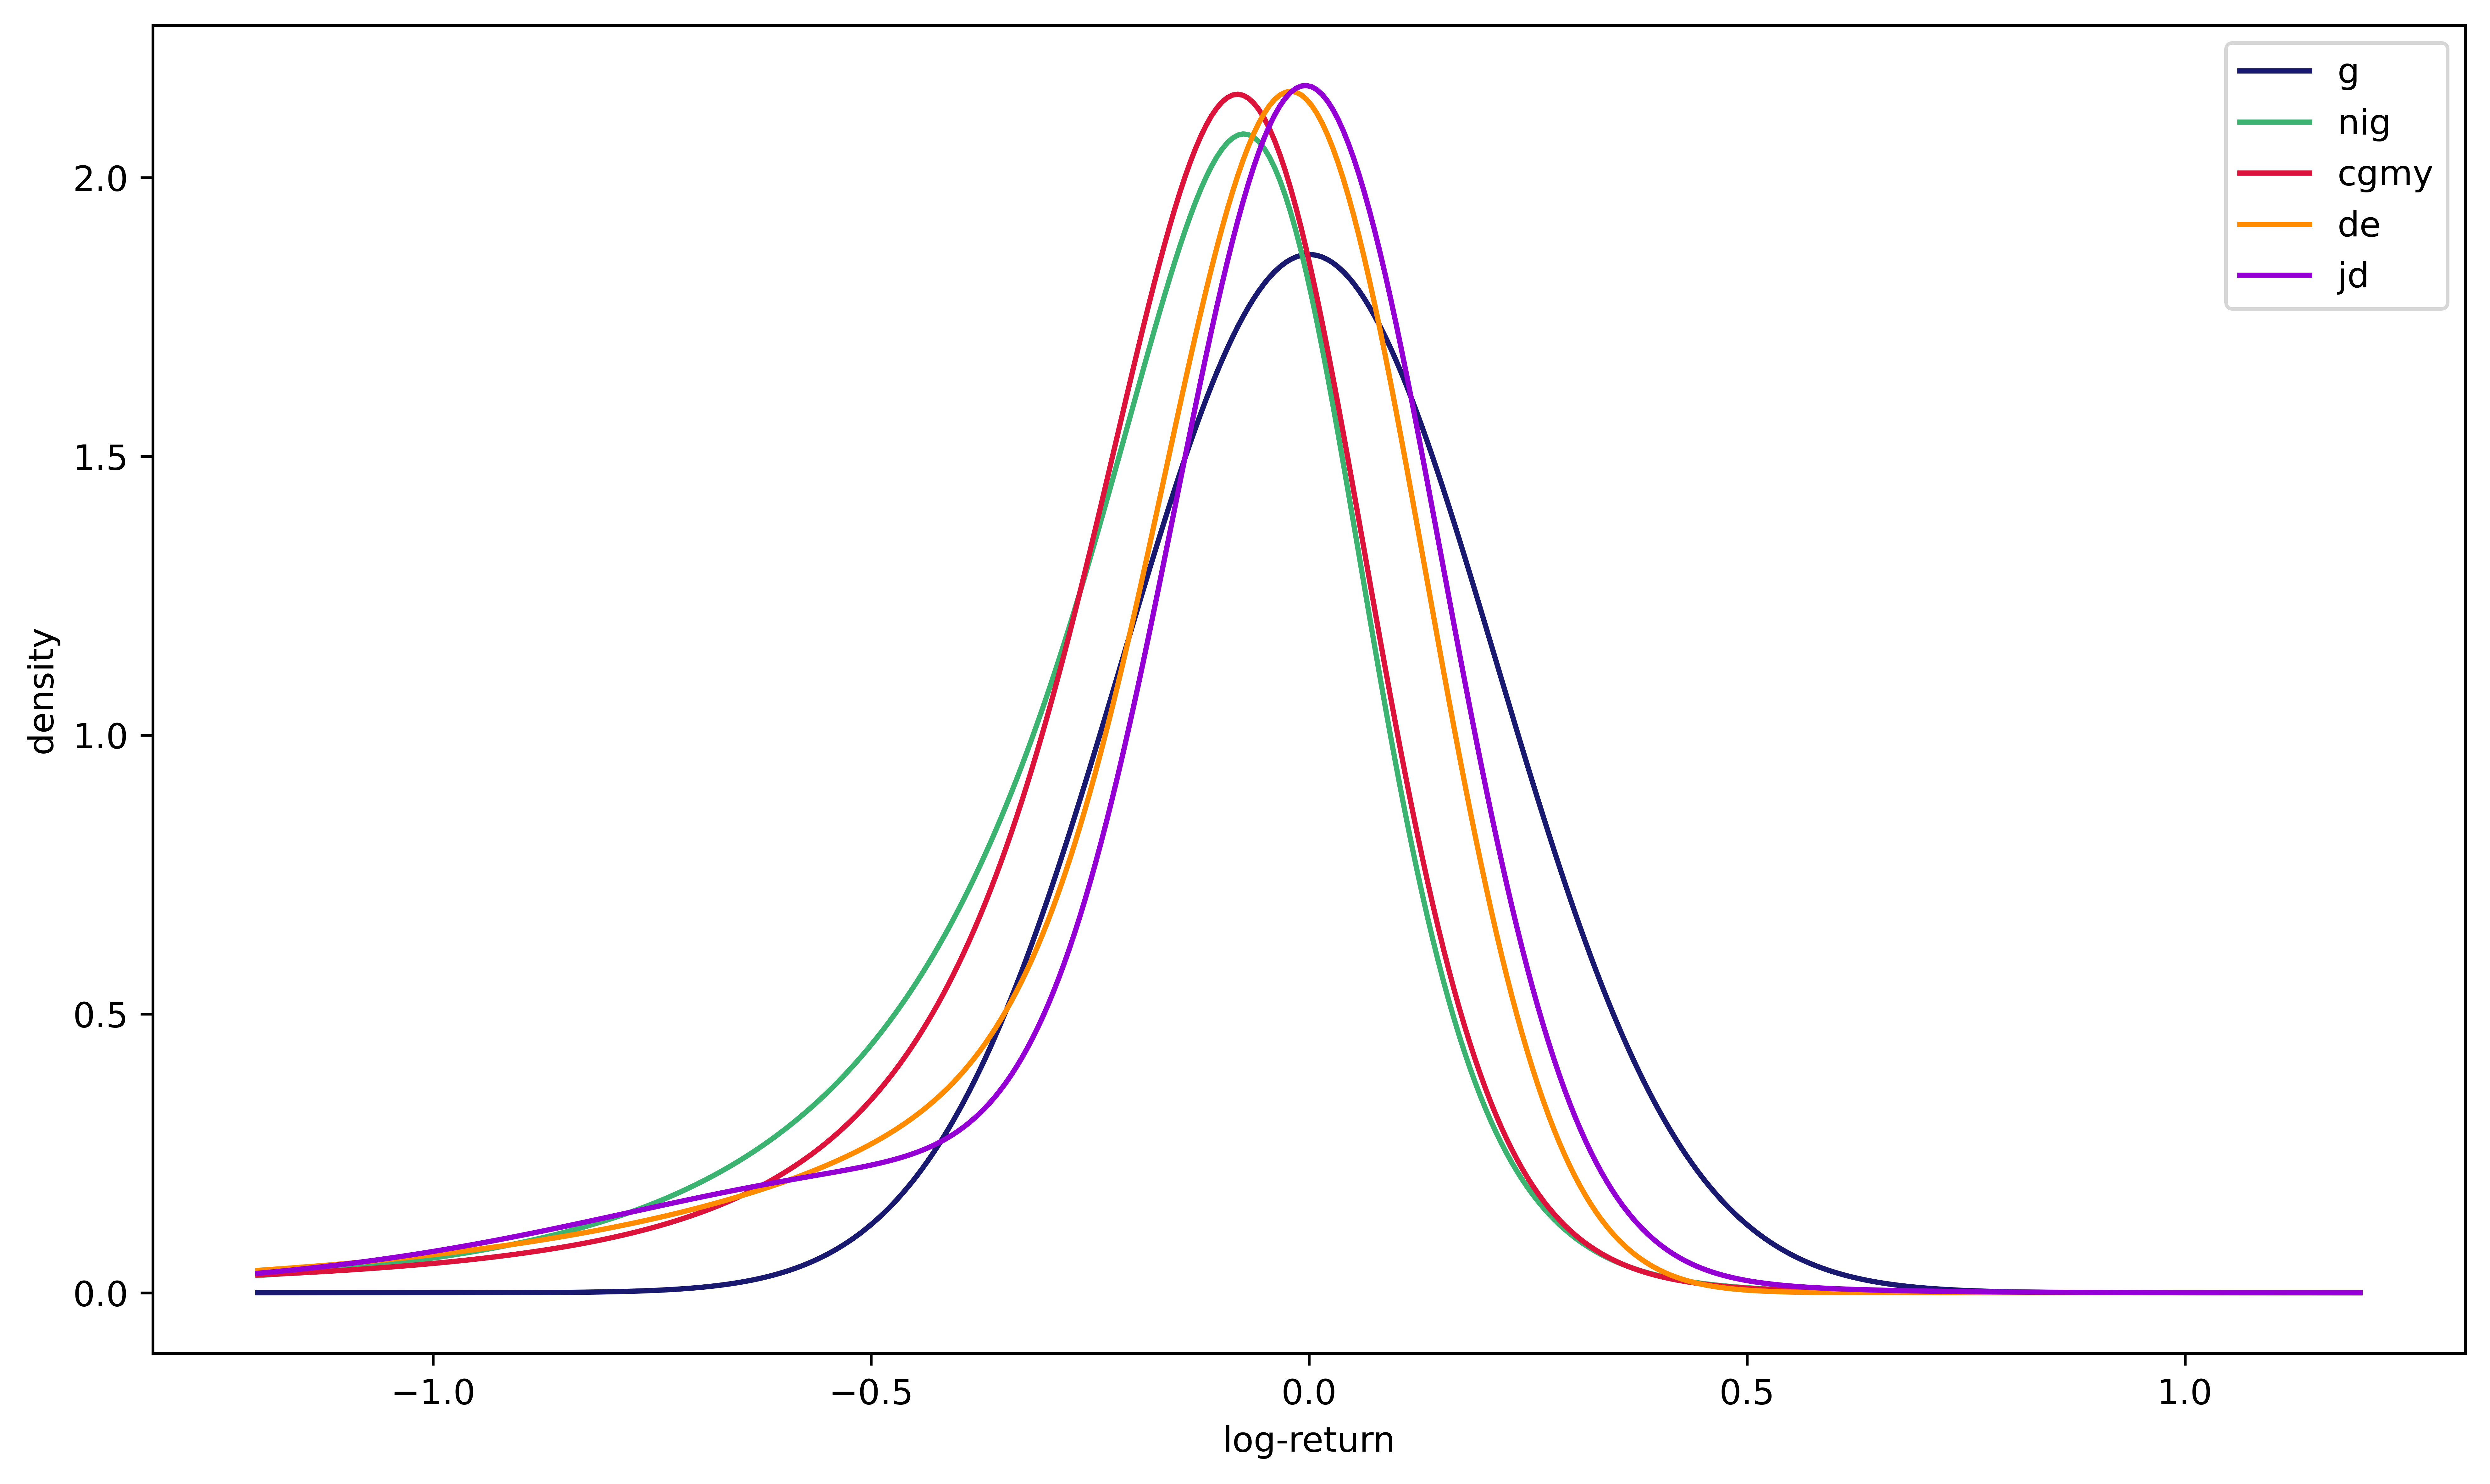

In [34]:
plt.figure(figsize=(10, 6), dpi=800)
plt.plot(x_values, bs_values, label='g', color='midnightblue')
plt.plot(x_values, nig_values, label='nig', color='mediumseagreen')
plt.plot(x_values, cgmy_values, label='cgmy', color='crimson')
plt.plot(x_values, de_values, label='de', color='darkorange')
plt.plot(x_values, jd_values, label='jd', color='darkviolet')
plt.xlabel('log-return')
plt.ylabel('density')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.savefig("char_func_density.png", dpi=800)
plt.show()